# WeatherPy
----

#### Note
* Instructions have been included for each segment. 

In [27]:
# pip install citipy

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# # Output File (CSV)
output_data_file = "../cities1.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

575

In [39]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [40]:
# Create empty lists to store data from API calls
new_cities = []
lat = []
lng = []
max_temp = []
wind_speed = []
humidity = []
cloudiness = []
country = []
datetime = []

counter = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    counter += 1
    
    try:
        new_cities.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        datetime.append(response['dt'])
        print(f"Processing record {counter} | {city}")
    
    except:
        print("City not found. Skipping...")
        pass

Processing record 1 | punta arenas
Processing record 2 | puerto natales
Processing record 3 | manokwari
Processing record 4 | robore
Processing record 5 | eiterfeld
Processing record 6 | lihue
Processing record 7 | bredasdorp
Processing record 8 | iqaluit
Processing record 9 | blackmans bay
Processing record 10 | west island
Processing record 11 | crixas
Processing record 12 | adamstown
Processing record 13 | yellowknife
Processing record 14 | ushuaia
Processing record 15 | port mathurin
Processing record 16 | papatowai
Processing record 17 | mil'kovo
Processing record 18 | lazaro cardenas
Processing record 19 | badger
Processing record 20 | taltal
Processing record 21 | port-aux-francais
Processing record 22 | newtown trim
Processing record 23 | waitangi
City not found. Skipping...
Processing record 25 | tiksi
Processing record 26 | trapani
Processing record 27 | port augusta
Processing record 28 | iskateley
Processing record 29 | la passe
Processing record 30 | rexburg
Processing rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:

weather_data = pd.DataFrame({
    'City':new_cities,
    'Lat':lat,
    'Lng':lng,
    'Max Temp':max_temp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': datetime
})

In [43]:
# Visualize to confirm data appears
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,38.05,93,89,9.10,CL,1691641399
1,Puerto Natales,-51.7236,-72.4875,34.11,95,88,3.58,CL,1691641397
2,Manokwari,-0.8667,134.0833,81.91,77,100,6.20,ID,1691641445
3,Roboré,-18.3333,-59.7500,75.52,53,0,2.13,BO,1691641623
4,Eiterfeld,50.7667,9.8000,54.00,90,80,2.28,DE,1691641601


In [49]:
# Save Data to csv
weather_data.to_csv(output_data_file)

In [ ]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,20.493596,12.893960,61.979106,70.869410,53.715564,7.872791,1.620171e+09
std,33.244801,93.720039,17.778270,21.265916,36.627148,5.478897,1.035761e+02
min,-54.800000,-179.166700,10.620000,6.000000,0.000000,0.380000,1.620171e+09
25%,-7.003300,-70.675000,47.785000,61.000000,20.000000,3.530000,1.620171e+09
50%,25.519800,18.957000,64.400000,75.000000,62.000000,6.350000,1.620171e+09
75%,49.841750,96.701650,77.000000,87.000000,90.000000,11.225000,1.620171e+09
max,78.218600,179.316700,91.990000,100.000000,100.000000,36.820000,1.620171e+09


Inspect the data and remove the cities where the humidity > 100%

## Plotting the Data
----
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels
* Save the plotted figures as .pngs

### Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output/Latitude_vs_MaxTemp.png'

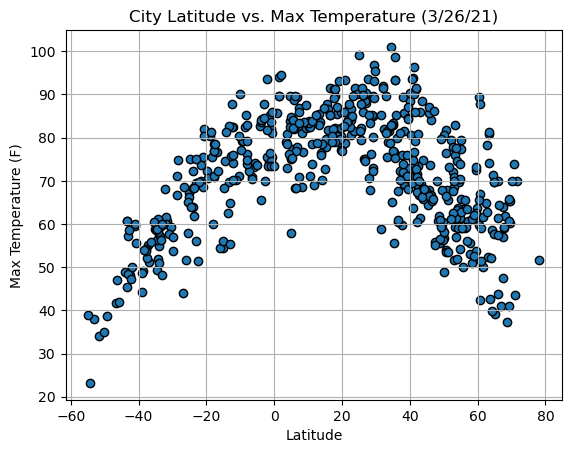

In [47]:
plt.scatter(weather_data['Lat'],weather_data['Max Temp'],marker='o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title ('City Latitude vs. Max Temperature (3/26/21)')
plt.grid(True)

plt.savefig('output/Latitude_vs_MaxTemp.png',bbox_inches='tight',facecolor='w')

plt.show()

# Plotting relationship between latitude and max temperature.
# Max temperature is the highest for cities near the equator or slightly north and the lowest temperatures are very far north though cities have more extreme north latitude points

Max temperature is the highest for cities near the equator or slightly north and the lowest temperatures are very far north though cities have more extreme north latitude points

### Latitude vs. Humidity Plot

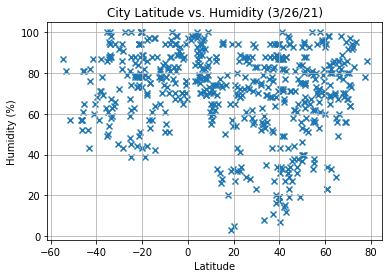

In [ ]:
plt.scatter(weather_data['Lat'],weather_data['Humidity'],marker='x',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title ('City Latitude vs. Humidity (3/26/21)')
plt.grid(True)

plt.savefig('output/Latitude_vs_Humidity.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting relationship between latitude and humidity.
# There is no significant trend between latitude and humidity. Cities near latitude of 20 generally seems to have lower humidity and near the equator tends to have higher humidity

There is no significant trend between latitude and humidity. Cities near latitude of 20 generally seems to have lower humidity and near the equator tends to have higher humidity

### Latitude vs. Cloudiness Plot

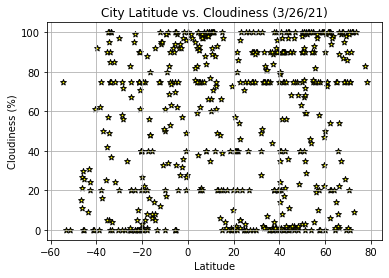

In [ ]:
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'],marker='*',color='yellow',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title ('City Latitude vs. Cloudiness (3/26/21)')
plt.grid(True)

plt.savefig('output/Latitude_vs_Cloudiness.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting relationship between latitude and cloudiness.
# There is no significant trend between latitude and cloudiness.

There is no significant trend between latitude and cloudiness.

### Latitude vs. Wind Speed Plot

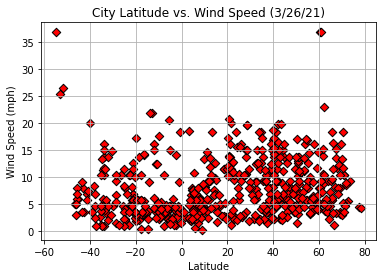

In [ ]:
plt.scatter(weather_data['Lat'],weather_data['Wind Speed'],marker='D',color="red",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title ('City Latitude vs. Wind Speed (3/26/21)')
plt.grid(True)

plt.savefig('output/Latitude_vs_Wind_Speed.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting relationship between latitude and wind speed.
# There is no significant trend between latitude and wind speed, not enough data points on the extremes where wind speed seems to increase slightly in the southern hemisphere to draw a conclusion

There is no significant trend between latitude and wind speed, not enough data points on the extremes where wind speed seems to increase slightly in the southern hemisphere to draw a conclusion

## Linear Regression

In [ ]:
# Split data into northern and souther hemisphere based on latitude
northern_df = weather_data.loc[weather_data['Lat'] >=0,:]
southern_df = weather_data.loc[weather_data['Lat'] < 0,:]

In [ ]:
# Quick check on northern hemisphere
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qinhuangdao,39.9317,119.5883,60.49,19,0,16.89,CN,1620171751
1,Jamestown,42.0970,-79.2353,60.80,82,90,5.75,US,1620171298
4,Camacha,33.0833,-16.3333,62.60,59,75,12.66,PT,1620171331
6,Muscat,23.6139,58.5922,80.60,69,20,18.41,OM,1620171547
7,Pindiga,9.9833,10.9333,79.95,59,66,13.38,NG,1620171752


In [ ]:
# Quick check on southern hemisphere
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Puerto Ayora,-0.7393,-90.3518,80.60,74,20,18.41,EC,1620171302
3,Hithadhoo,-0.6000,73.0833,83.53,67,28,3.36,MV,1620171038
5,Cidreira,-30.1811,-50.2056,66.54,92,97,14.88,BR,1620171290
8,East London,-33.0153,27.9116,66.34,59,4,3.42,ZA,1620171283
9,Rikitea,-23.1203,-134.9692,78.51,79,99,10.38,PF,1620171270


### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7812306556905557


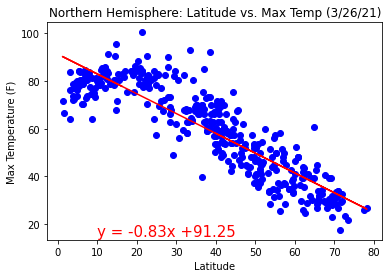

In [ ]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, marker='o', color='blue')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Latitude vs. Max Temp (3/26/21)')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('output/northernhemi_maxtemp.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting max temperature trend in northern hemisphere.
# Max temperature decreases as you increase in latitude with few outliers

Max temperature decreases as you increase in latitude with few outliers

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5511757389733033


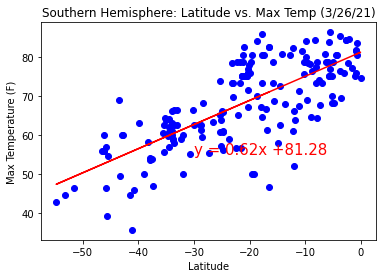

In [ ]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, marker='o',color='Blue')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Latitude vs. Max Temp (3/26/21)')
plt.annotate(line_eq,(-30,55),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('output/southernhem_maxtemp.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting max temperature trend in southern hemisphere.
# Max temperature decreases as you decrease in latitude but more outliers than northern hemisphere

Max temperature decreases as you decrease in latitude but more outliers than northern hemisphere

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0010248568943100474


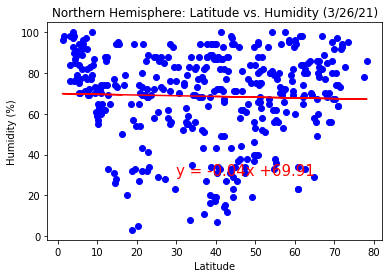

In [ ]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values,color='Blue')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Latitude vs. Humidity (3/26/21)')
plt.annotate(line_eq,(30,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('output/northernhem_humidity.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting humidity trend in northern hemisphere.
# There is no significant trend observed.

There is no significant trend observed.

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04764238473281958


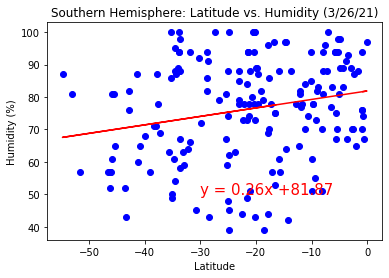

In [ ]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values,color='Blue')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Latitude vs. Humidity (3/26/21)')
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('output/southernhem_humidity.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting humidity trend in souther hemisphere.
# There is no significant trend observed.

There is no significant trend observed.

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 7.674529081363088e-05


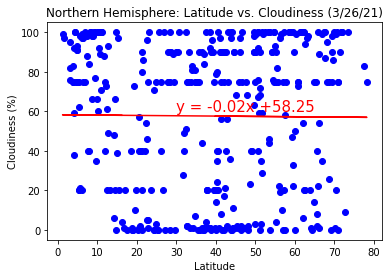

In [ ]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values,color='Blue')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Latitude vs. Cloudiness (3/26/21)')
plt.annotate(line_eq,(30,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('output/northernhem_cloudiness.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting cloudiness trend in northern hemisphere.
# There is no significant trend observed.

There is no significant trend observed.

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06338400126702068


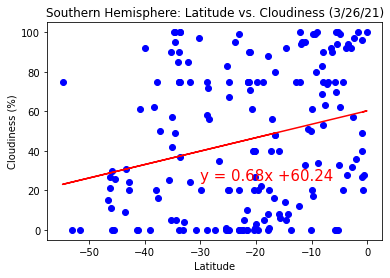

In [ ]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values,color='Blue')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Latitude vs. Cloudiness (3/26/21)')
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('output/southernhem_cloudiness.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting cloudiness trend in southern hemisphere.
# There is no significant trend observed.

There is no significant trend observed.

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02013309984579132


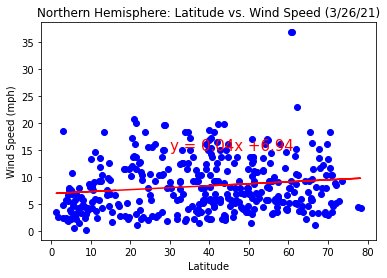

In [ ]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values,color='Blue')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere: Latitude vs. Wind Speed (3/26/21)')
plt.annotate(line_eq,(30,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('output/northernhem_windspeed.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting wind speed trend in northern hemisphere.
# There is no significant trend observed.

There is no significant trend observed.

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05403929130129009


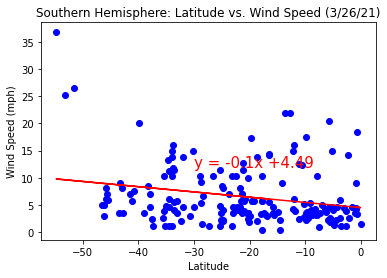

In [ ]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values,color='Blue')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere: Latitude vs. Wind Speed (3/26/21)')
plt.annotate(line_eq,(-30,12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save plot as png
plt.savefig('output/southernhem_windspeed.png',bbox_inches='tight',facecolor='w')

plt.show()
# Plotting wind speed trend in southern hemisphere.
# There is no significant trend observed.

There is no significant trend observed.